In [4]:
import pandas as pd
from pandas_datareader import data
import numpy as np
import random as rnd
import datetime

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

# plotly
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import cufflinks as cf
cf.go_offline()

# web scraping
import requests
import bs4
import csv
import json 
import re
from io import StringIO

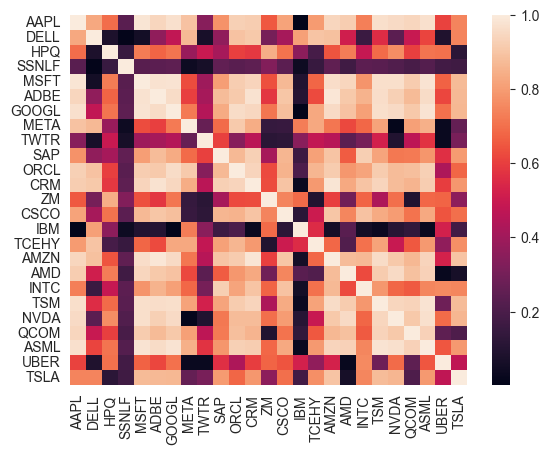

In [2]:
stock_list = ['AAPL', 'DELL', 'HPQ', 'SSNLF', 'MSFT', 'ADBE', 'GOOGL', 'META', 
            'TWTR', 'SAP', 'ORCL', 'CRM', 'ZM', 'CSCO', 'IBM', 'TCEHY', 'AMZN', 
            'AMD', 'INTC', 'TSM', 'NVDA', 'QCOM', 'ASML','UBER', 'TSLA']

opening_df = pd.DataFrame()
monthly_opening = pd.DataFrame()

for name in stock_list:
    # read files
    fname = r"C:\IIT\DS203\Project\yfinance\\" + name + ".csv"
    df = pd.read_csv(fname)

    opening_df[name] = df['Open']

Matrix = opening_df.corr(method='pearson')
fig, ax = plt.subplots()
sns.heatmap(abs(Matrix), annot=False)
plt.show()

AAPL      DELL       HPQ  SSNLF      MSFT      ADBE     GOOGL  \
0     0.000000  0.000000  0.000000    0.0  0.000000  0.000000  0.000000   
1     3.799378  1.149425 -1.707655    0.0  1.980954  4.032258  5.060116   
2    -0.399299 -2.954545  2.501740    0.0  0.709745 -1.136957  0.473077   
3     0.561276  0.702577  0.000000    0.0 -0.259643  0.627291  2.437213   
4     1.966769  1.744185  1.728819    0.0  0.148758  1.428569  2.088124   
...        ...       ...       ...    ...       ...       ...       ...   
4239 -4.625713       NaN -3.887689    NaN -4.083505 -6.827873 -5.080276   
4240  0.021117       NaN  2.509364    NaN -1.154070 -2.251995 -1.065800   
4241 -3.504818       NaN  3.580561    NaN  2.040911 -0.485572  2.201402   
4242  2.406829       NaN  2.292768    NaN  3.022655  4.214968  1.856098   
4243 -1.360305       NaN -1.724138    NaN -0.581549 -0.498091 -0.506192   

           META       TWTR       SAP  ...     TCEHY      AMZN       AMD  \
0      0.000000   0.000000  0.000000  ...  0.000000  0.000000  0.000000   
1    -13.127231   1.840359  1.863623  ...  0.134109  0.042129  4.771114   
2    -10.730901 -11.822339  3.142486  ... -4.062504 -0.694883  0.030764   
3     -3.802514   7.802469  1.460770  ... -0.186131  1.717554  4.275618   
4      5.036659  -6.023823  0.411355  ...  3.496506 -2.960178 -0.442482   
...         ...        ...       ...  ...       ...       ...       ...   
4239        NaN        NaN -3.465762  ...       NaN -4.983558 -7.761904   
4240        NaN        NaN  2.539924  ...       NaN -1.059807  7.554637   
4241        NaN        NaN  1.327338  ...       NaN  0.502786  0.688000   
4242        NaN        NaN  0.948949  ...       NaN -1.261551  1.843312   
4243        NaN        NaN  0.071523  ...       NaN -1.453904 -2.824150   

          INTC       TSM      NVDA       QCOM      ASML      UBER       TSLA  
0     0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   0.000000  
1     1.627629 -1.456315  4.732117   1.734104  0.884084 -7.642855  35.736783  
2     1.289062  2.167493  2.051407   2.795454  1.996106 -1.237431  -3.063168  
3     2.121092  4.146585  3.409677   0.707494  4.916470  2.766895  -8.000041  
4    -0.339880  1.666652  0.442916   3.051590  0.181976  5.359412 -13.043477  
...        ...       ...       ...        ...       ...       ...        ...  
4239 -2.900600 -4.000000 -5.826720 -12.071436 -6.222742       NaN        NaN  
4240  0.437155  2.516664  7.229938   2.136428  4.888843       NaN        NaN  
4241  2.865437  1.804586  1.730300   0.816061  2.699250       NaN        NaN  
4242  1.410436  2.794640  4.027267   3.805356  4.932295       NaN        NaN  
4243 -1.877611  3.355594 -4.317276  -0.098593 -0.750625       NaN        NaN  

[4244 rows x 25 columns]

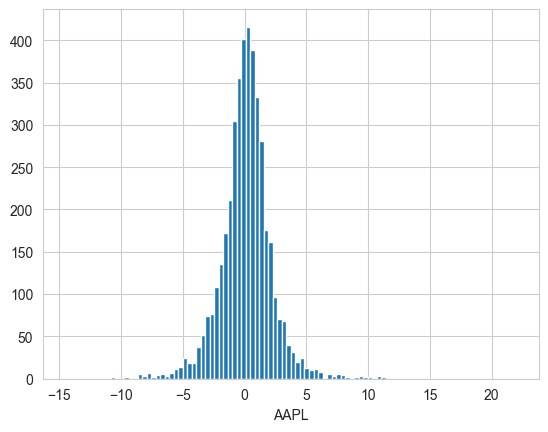

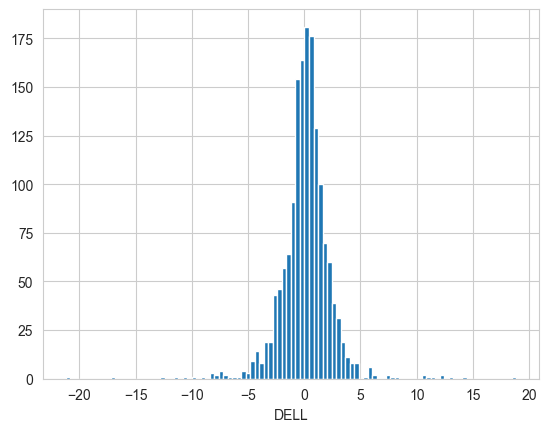

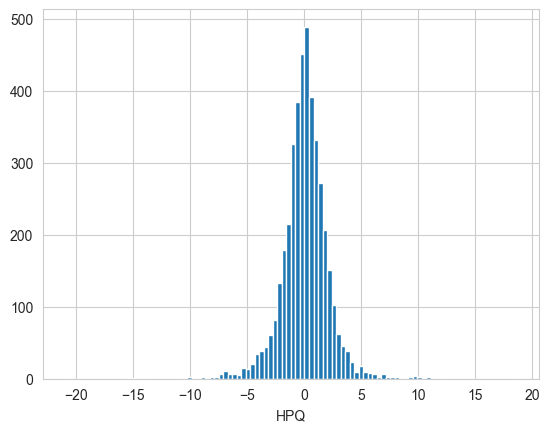

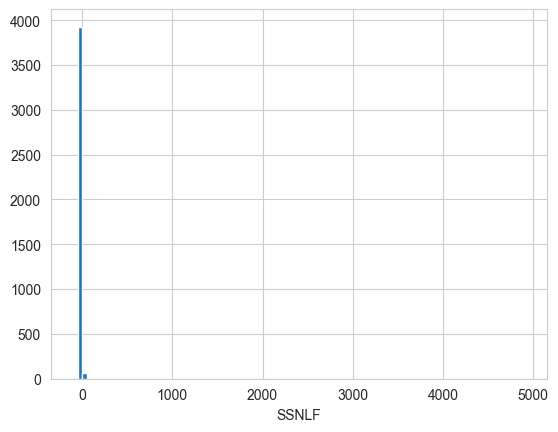

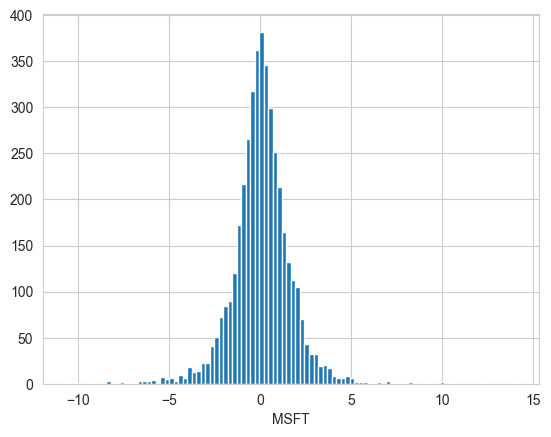

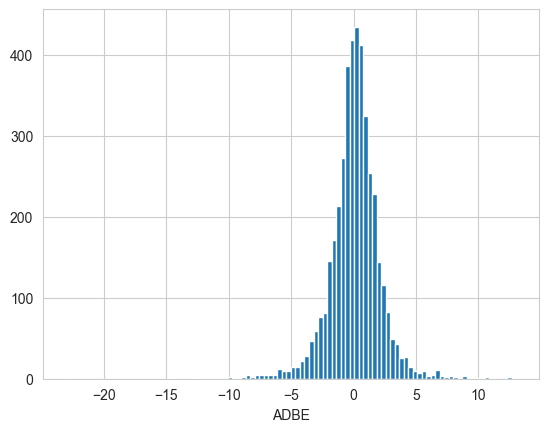

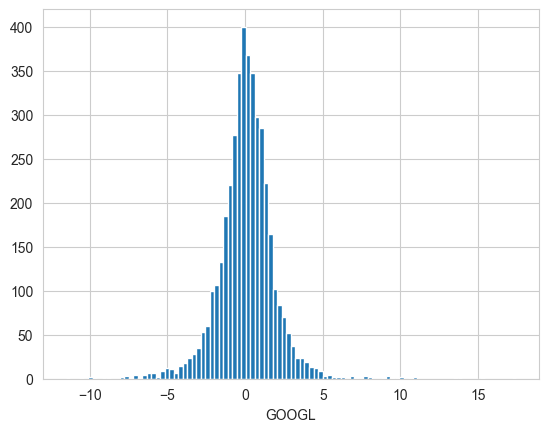

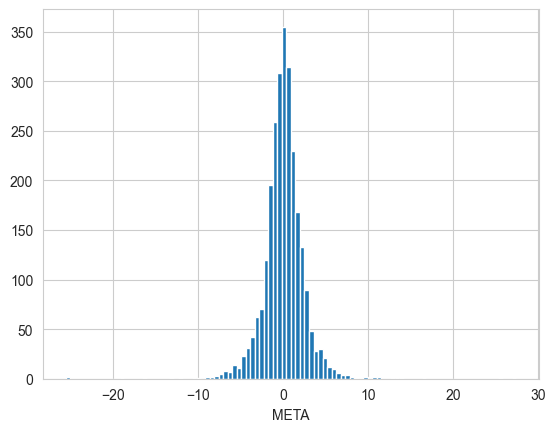

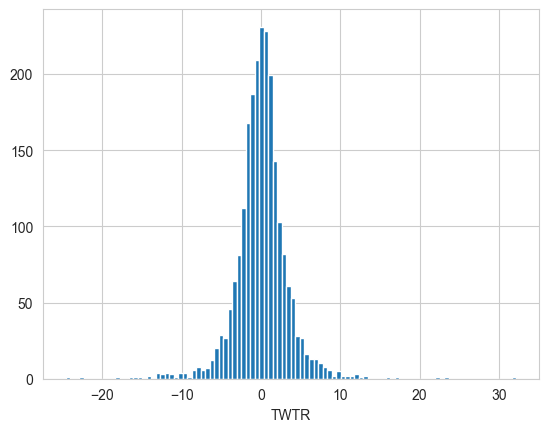

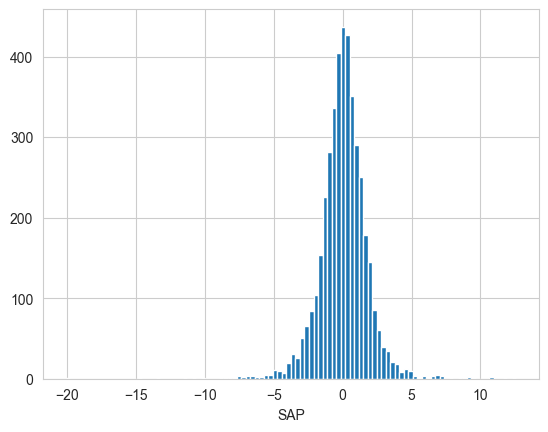

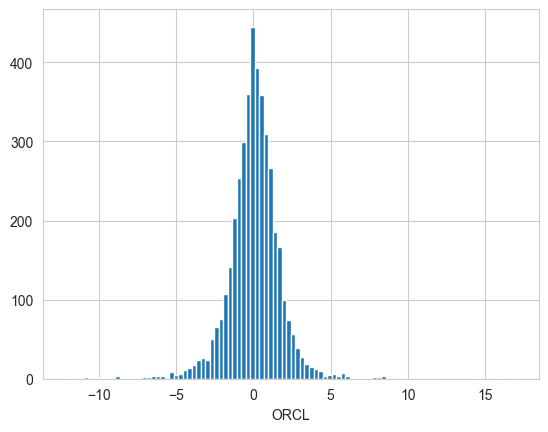

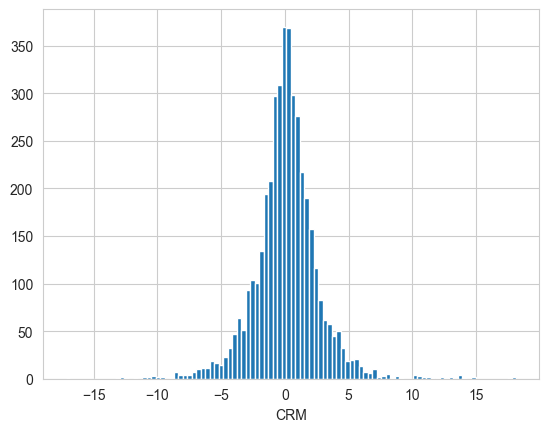

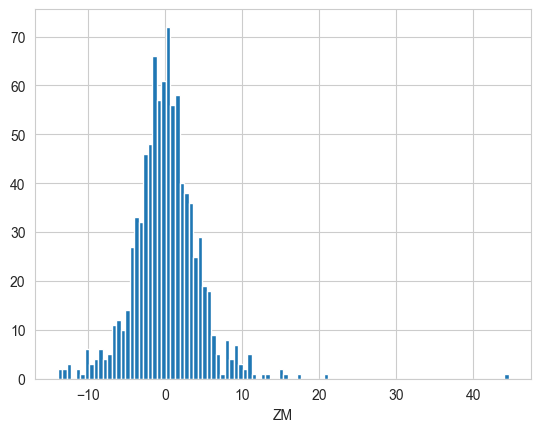

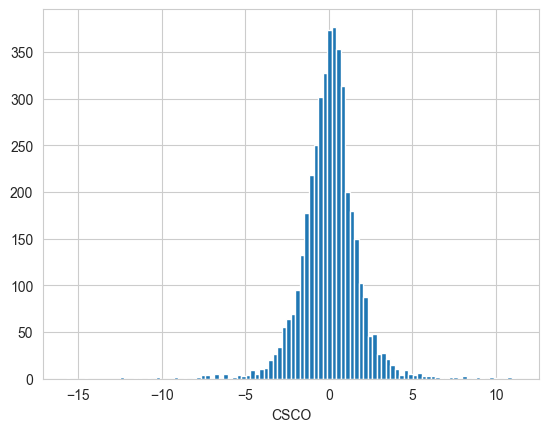

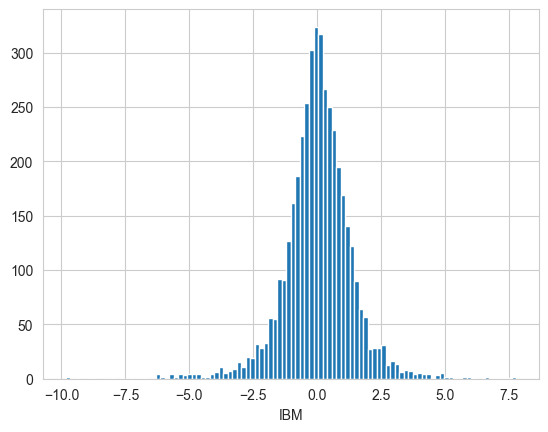

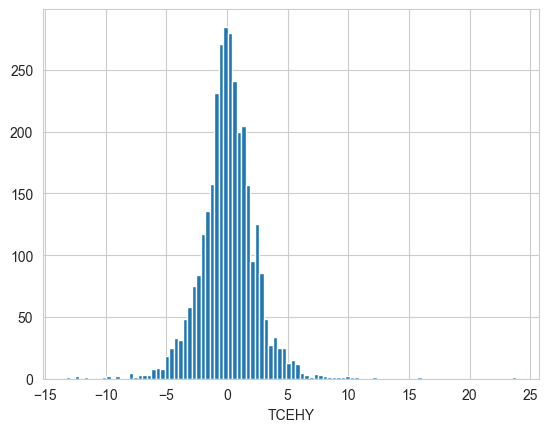

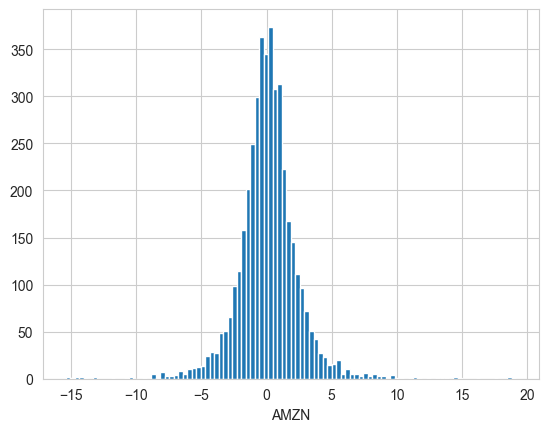

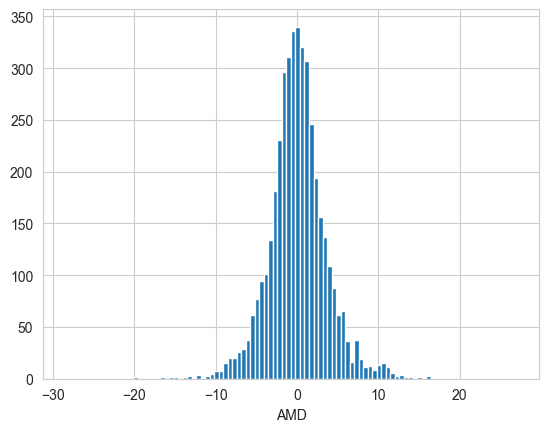

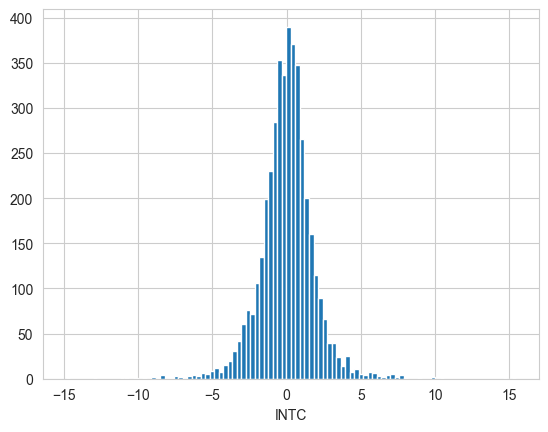

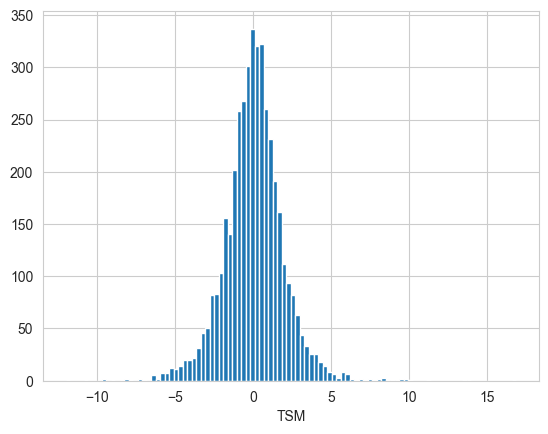

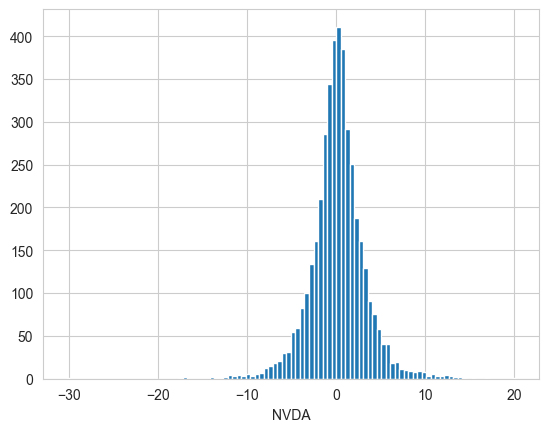

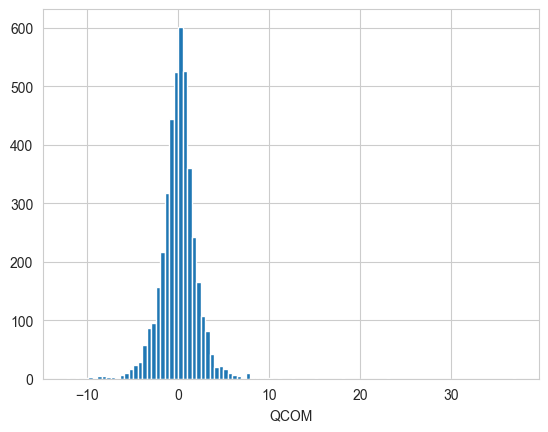

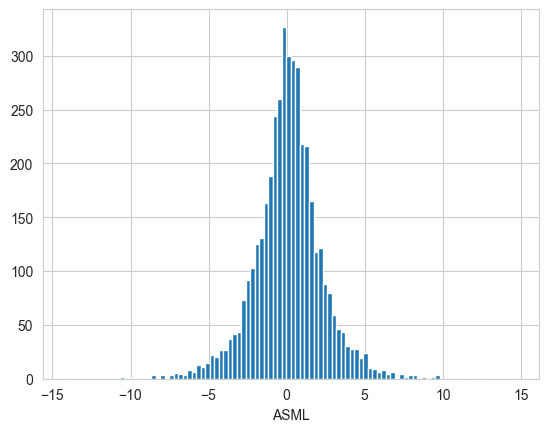

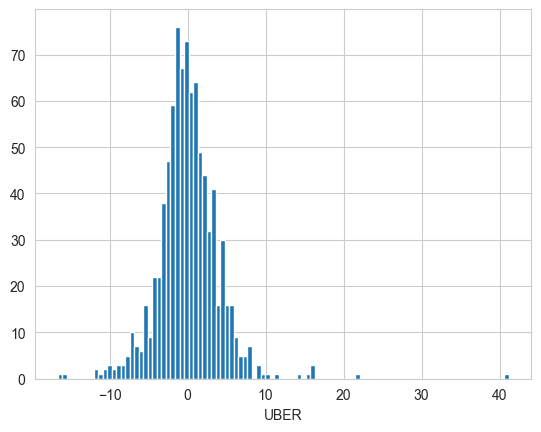

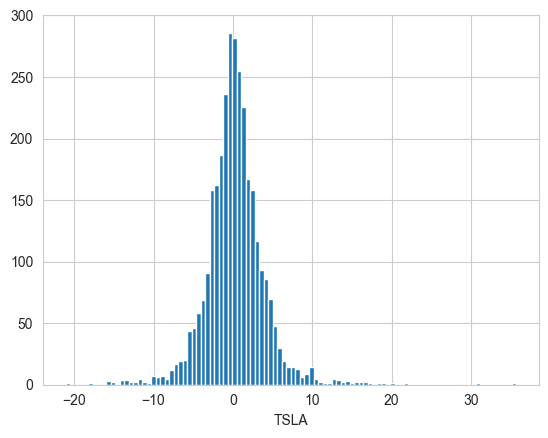

In [27]:
# calculating average returns over the months for these companies

for name in stock_list:
    # read files
    fname = r"C:\IIT\DS203\Project\yfinance\\" + name + ".csv"
    df = pd.read_csv(fname)

    monthly_opening[name] = df['Open']
    for j in range(1, len(monthly_opening[name])):
        i = len(monthly_opening[name]) - j
        monthly_opening[name][i] = (monthly_opening[name][i] - monthly_opening[name][i-1])/monthly_opening[name][i-1]*100
    monthly_opening[name][0] = 0

display(monthly_opening)

for column in monthly_opening:
    plt.figure()
    plt.hist(monthly_opening[column], bins = 100) 
    plt.xlabel(column)
    plt.show()